In [1]:
from helper_methods import extract_frame_pairs
from model import build_convlstm_model
from helper_methods import show_frame
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np

In [2]:
#extract n,n+1 pairings from video data
X,Y = extract_frame_pairs("horse_data0.mp4")
for i in range(1,4):
    tempX,tempY = extract_frame_pairs("horse_data"+str(i)+".mp4")
    X = np.concatenate([X,tempX],axis=0)
    Y = np.concatenate([Y,tempY],axis=0)
print(X.shape)
print(Y.shape)

(2080, 64, 64, 1)
(2080, 64, 64, 1)


In [3]:
#shuffle X,Y
#show_frame(X[2000])
indices = np.arange(len(X))
np.random.shuffle(indices)

X_shuffled = X[indices]
Y_shuffled = Y[indices]
#show_frame(X_shuffled[2000])


In [4]:
X_temp, X_test, Y_temp, Y_test = train_test_split(X_shuffled, Y_shuffled, test_size=0.1, random_state=1)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=1)

In [6]:
model = build_convlstm_model(64, 64, 1)


Epoch 1/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - loss: 0.6621 - mse: 0.0629 - val_loss: 0.3645 - val_mse: 0.0182
Epoch 2/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 220ms/step - loss: 0.3695 - mse: 0.0248 - val_loss: 0.3113 - val_mse: 0.0142
Epoch 3/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - loss: 0.3129 - mse: 0.0144 - val_loss: 0.2973 - val_mse: 0.0136
Epoch 4/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - loss: 0.2994 - mse: 0.0137 - val_loss: 0.2930 - val_mse: 0.0136
Epoch 5/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - loss: 0.2919 - mse: 0.0130 - val_loss: 0.2903 - val_mse: 0.0132
Epoch 6/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - loss: 0.2908 - mse: 0.0127 - val_loss: 0.2868 - val_mse: 0.0124
Epoch 7/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - loss: 0.2903 - mse: 0.0125 - val_loss: 0.2843 - val_mse: 0.0119
Epoch 8/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - loss: 0.2921 - mse: 0.0123 - val_loss: 0.2830 - val_mse: 0.0116
Epoch 9/12
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 240ms/

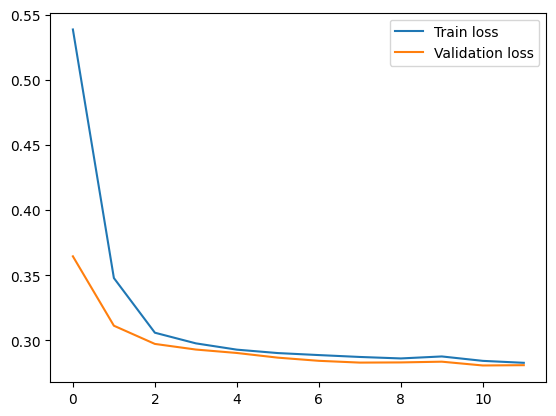

In [7]:
history = model.fit(X_train, Y_train, validation_data=(X_val,Y_val), epochs=12)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

In [8]:
model.evaluate(X_test,Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.2698 - mse: 0.0112


[0.27215492725372314, 0.011230929754674435]

(208, 64, 64, 1)


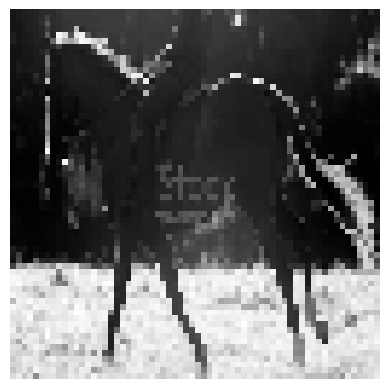

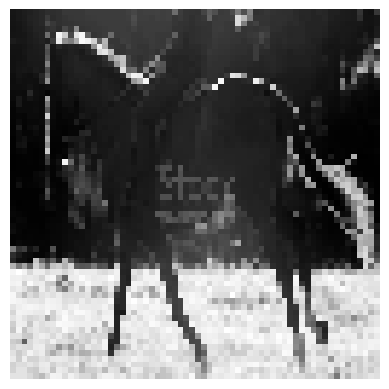

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


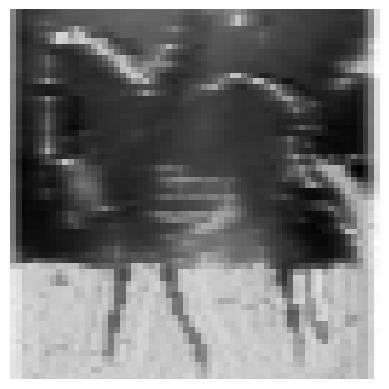

In [16]:
print(X_test.shape)
k = 10
show_frame(X_test[k])
show_frame(Y_test[k])
test = model.predict(X_test[k])
show_frame(np.reshape(test,(64,64,1)))